## Electric Vehicle sales Prediction

#### About Dataset

Welcome to the "Electric Vehicle Specifications and Prices" dataset, a comprehensive collection of data meticulously scraped from EV Database, a leading source for electric vehicle information. This dataset presents a detailed exploration of various electric vehicles, providing valuable insights into their specifications, pricing, and performance metrics.

#### Dataset Overview:

With 360 observations and 9 variables, this dataset encompasses a rich array of information crucial for understanding the landscape of electric mobility. Each entry includes details on the vehicle's battery capacity, model name, link to the EV Database for additional information, efficiency ratings, fast-charging capabilities, pricing in Germany, range, top speed, and acceleration from 0 to 100 km/h.

#### Data Features:

Battery: The capacity of the vehicle's battery in kilowatt-hours (kWh). Car_name: The model name of the electric vehicle. Car_name_link: A direct link to the corresponding page on EV Database for more in-depth information. Efficiency: The energy efficiency rating of the vehicle in watt-hours per kilometer (Wh/km). Fast_charge: The fast-charging capability of the vehicle in minutes for a certain charging percentage. Price.DE.: The price of the electric vehicle in Germany. Range: The driving range of the vehicle on a single charge in kilometers. Top_speed: The maximum speed the vehicle can achieve in kilometers per hour. Acceleration..0.100.: The acceleration time from 0 to 100 kilometers per hour.

Source: Kaggle.com

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# import data
data=pd.read_csv('EV_cars.csv')
data.rename(columns=lambda x: x.lower(), inplace=True)
data.rename(columns={'fast_charge':'target'}, inplace=True)

data.head()

,battery,car_name,car_name_link,efficiency,target,price.de.,range,top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


### 1. Data Cleaning and Processing

In [3]:
data.dtypes 
#To know whether I'm dealing with numerical or categorical data

battery                 float64
car_name                 object
car_name_link            object
efficiency                int64
target                  float64
price.de.               float64
range                     int64
top_speed                 int64
acceleration..0.100.    float64
dtype: object

In [4]:
#data size
data.shape

(360, 9)

In [5]:
data['price.de.'].value_counts()

price.de.
37990.0     3
46990.0     3
47500.0     2
54430.0     2
47490.0     2
           ..
44200.0     1
37540.0     1
58500.0     1
159000.0    1
56990.0     1
Name: count, Length: 271, dtype: int64

In [6]:
#missing values
data.isnull().sum()

battery                  0
car_name                 0
car_name_link            0
efficiency               0
target                   2
price.de.               51
range                    0
top_speed                0
acceleration..0.100.     0
dtype: int64

As I can see here, there are some missing values in this case. The Price feature miss 51 values.

In [7]:
# check duplicated values
data.duplicated().sum()

0

In [8]:
#clean data to remove Nan values
clean_df = data.dropna()
print(clean_df)

     battery                             car_name  \
0       75.0  Tesla Model Y Long Range Dual Motor   
1       57.5                        Tesla Model 3   
2       60.5                           BYD ATTO 3   
3       61.7               MG MG4 Electric 64 kWh   
4       75.0  Tesla Model 3 Long Range Dual Motor   
..       ...                                  ...   
355     46.3      Citroen e-Jumpy Combi XL 50 kWh   
356     46.3              Fiat E-Ulysse L2 50 kWh   
357     46.3         Opel Vivaro-e Combi L 50 kWh   
358     68.0          Opel Zafira-e Life M 75 kWh   
359     46.3              Fiat E-Ulysse L3 50 kWh   

                                         car_name_link  efficiency  target  \
0    https://ev-database.org/car/1619/Tesla-Model-Y...         172   670.0   
1       https://ev-database.org/car/1991/Tesla-Model-3         137   700.0   
2          https://ev-database.org/car/1782/BYD-ATTO-3         183   370.0   
3    https://ev-database.org/car/1708/MG-MG4-Electr

In [9]:
# getting the statistical summary of dataset
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery,307.0,71.386319,20.363656,21.3,57.5,70.5,85.0,123.0
efficiency,307.0,195.586319,32.672692,137.0,171.0,188.0,209.5,295.0
target,307.0,552.833876,240.318651,170.0,335.0,520.0,680.0,1290.0
price.de.,307.0,67529.882736,34462.344923,22550.0,45867.5,56950.0,73624.5,218000.0
range,307.0,370.602606,107.870255,135.0,297.5,380.0,447.5,685.0
top_speed,307.0,181.429967,36.479166,125.0,155.0,180.0,200.5,282.0
acceleration..0.100.,307.0,7.275896,3.087695,2.1,4.8,6.7,9.0,19.1


In [10]:
# Checking the values of target equal to zero
clean_df.loc[clean_df['target']==0]


,battery,car_name,car_name_link,efficiency,target,price.de.,range,top_speed,acceleration..0.100.


There is no mising value from my target feature.

### 2. Exploratory Data Analysis

/var/folders/4_/4vpfyj9x1zs61yhjztnqgbsr0000gn/T/ipykernel_2390/2080490678.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clean_df['target'],


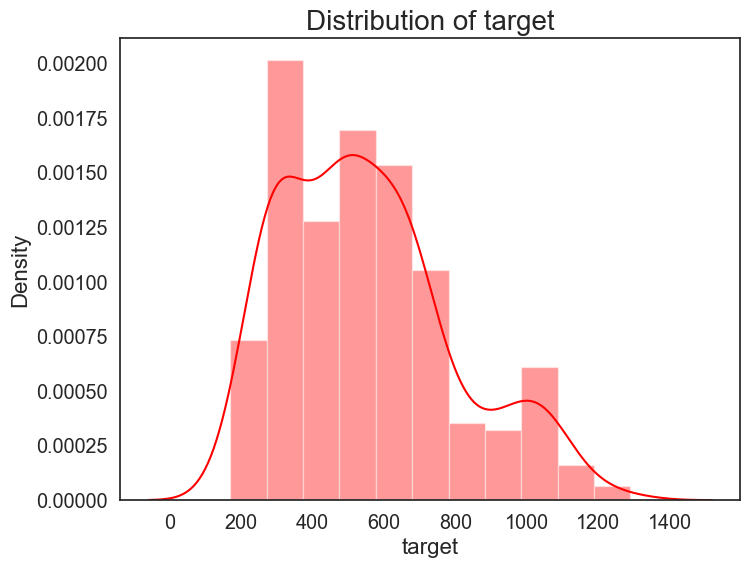

In [11]:
# Efficiency based analysis
sns.set(font_scale=1.3)

plt.figure(figsize=(8,6))
sns.set_style("white")
sns.distplot(clean_df['target'],
             color='red',
             kde=True)


plt.title("Distribution of target",fontsize=20)
plt.xlabel("target",fontsize=16)
plt.ylabel("Density",fontsize=16)
plt.show()

Most of the models have a target fast charge between (200–800).

<Axes: xlabel='efficiency'>

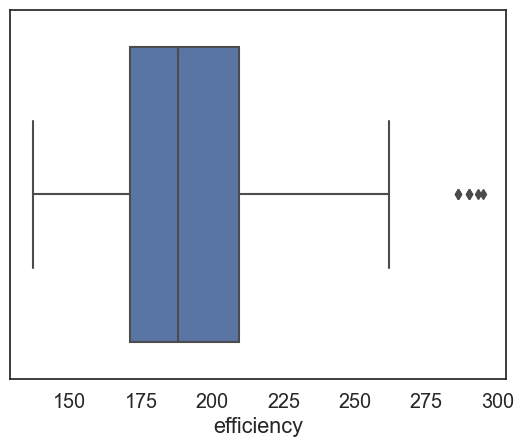

In [12]:
#spot outliers
sns.boxplot(x=clean_df['efficiency'])

/Users/maduffaut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


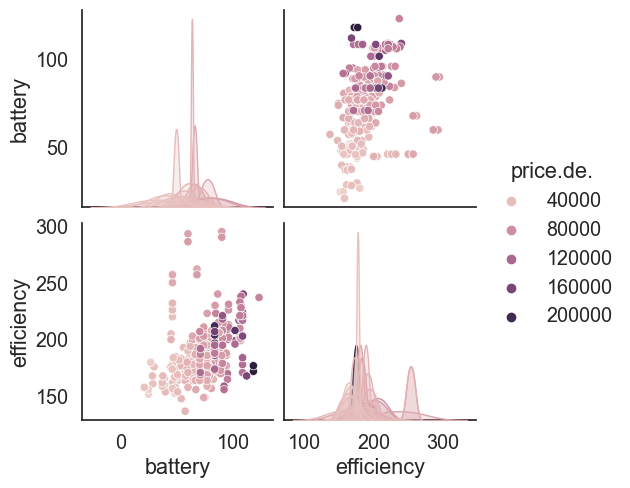

In [13]:
sample_data=data.sample(n=100)
sns.pairplot(data=data,vars=['battery', 'efficiency'], hue='price.de.')
plt.show()

/Users/maduffaut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


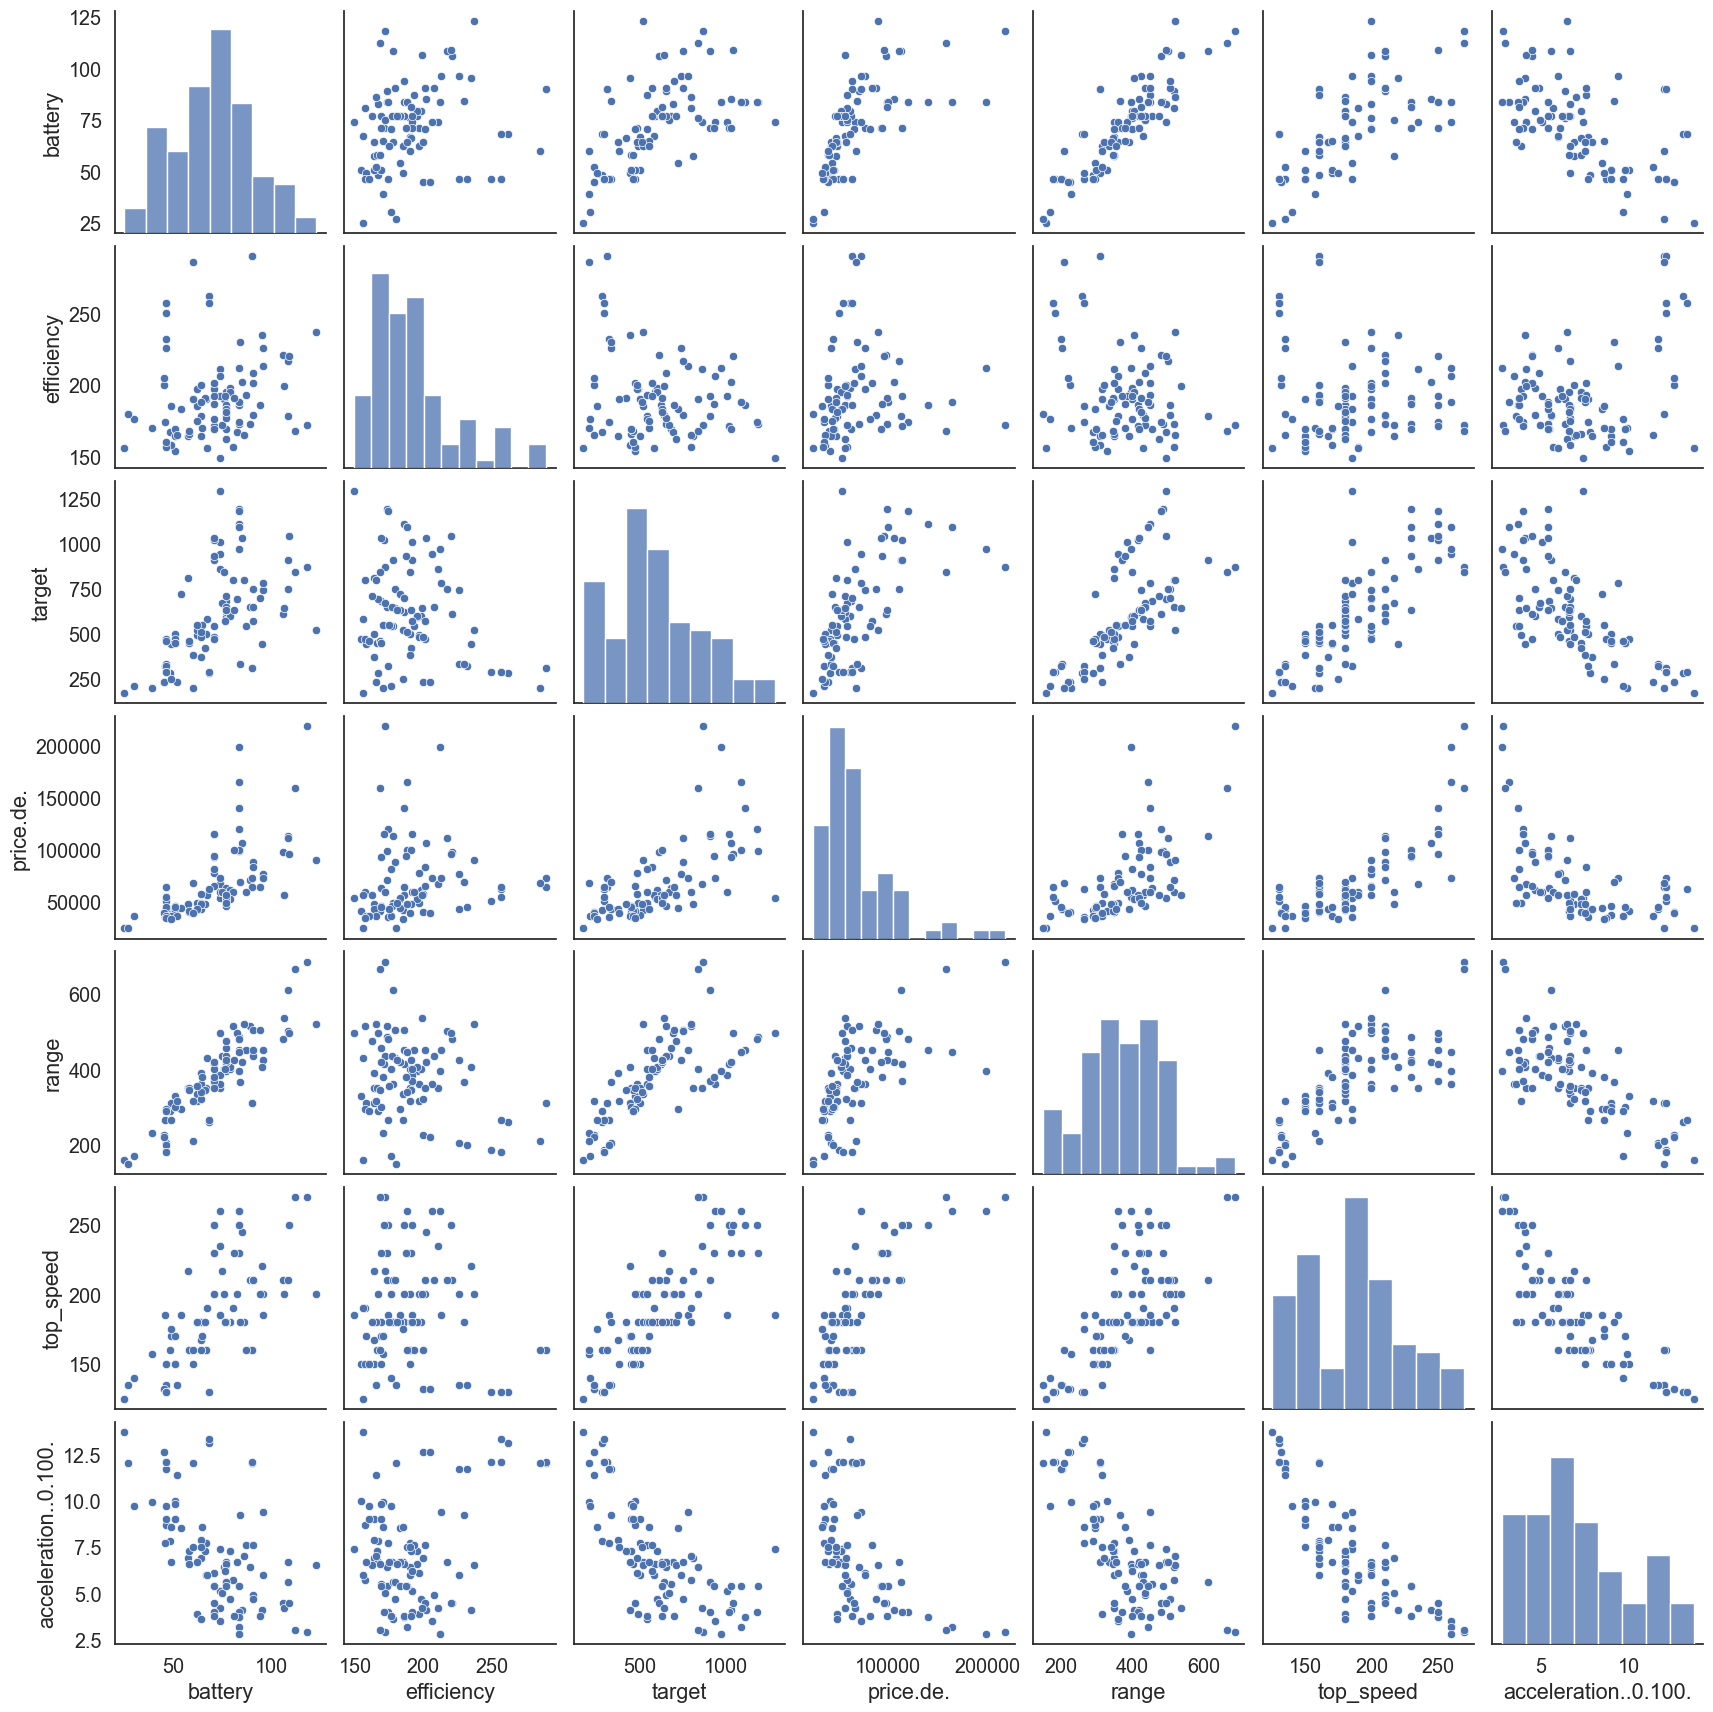

In [14]:
sns.pairplot(sample_data)

### 3. Feature Engineering

1.The column price is missing too many values. And, because the described price is related to Germany, I choose to drop that feature from my dataset.

2.The car name link is both text and a URL. That is very unlikely to have an predictive values and should have been dropped

In [15]:

df = clean_df.drop(clean_df.columns[[2, 5]],axis = 1)
df.head()

,battery,car_name,efficiency,target,range,top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,172,670.0,435,217,5.0
1,57.5,Tesla Model 3,137,700.0,420,201,6.1
2,60.5,BYD ATTO 3,183,370.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,171,630.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,149,780.0,505,201,4.4


In [16]:
#Normalizing the data to eliminate redundant data, 
#minimize data modification errors, and simplify the query process.
from sklearn import preprocessing

In [17]:
Battery_array = np.array(df['battery'])
print("battery array: ",Battery_array)

battery array:  [ 75.   57.5  60.5  61.7  75.   57.5  71.   64.   44.   82.5  80.7  60.
  64.7  64.   75.   64.8  95.   74.   37.3  85.4  95.   60.5  58.   25.
  81.2  80.7  50.8  68.3 101.7  64.   49.   62.   74.   77.  105.2 106.
  50.8  82.5  77.   65.4  58.   52.   96.   46.3  85.   77.   86.4  28.9
  67.   74.   74.   74.   50.8  87.   39.   77.   77.   94.   46.3 118.
  74.4  74.   57.5  61.9  44.9 109.   79.   64.   64.7  54.   46.3  61.7
  62.   64.  108.4 106.5  79.   94.   77.   81.2  85.   74.   57.4  30.
  84.   39.2 106.5  52.   96.   64.   95.   70.5  74.   50.8  95.   79.
  54.   77.  106.   64.7  77.   64.  105.2  50.8  62.   70.   59.   79.
  25.   77.  108.4  96.   60.   58.   46.3  91.  112.   66.   67.   50.8
  45.4 107.   70.   49.   64.   89.   63.   54.  118.  107.   66.5  90.
  70.5  91.   52.  123.   90.   77.   79.   75.   96.   49.   72.6  79.
  84.7  77.  106.5  89.   28.5 109.   62.   50.8 108.4  44.9  48.1  56.
  77.   40.   47.   50.8  92.  107.   77.   6

In [18]:
Battery_array = np.array(df['battery'])

In [19]:
normalized_arr = preprocessing.normalize([Battery_array])
print("Normalized Battery array: ",normalized_arr)

Normalized Battery array:  [[0.05766901 0.04421291 0.04651967 0.04744237 0.05766901 0.04421291
  0.05459333 0.04921089 0.03383249 0.06343591 0.06205186 0.04613521
  0.04974913 0.04921089 0.05766901 0.04982603 0.07304742 0.05690009
  0.02868072 0.06566578 0.07304742 0.04651967 0.04459737 0.019223
  0.06243632 0.06205186 0.03906114 0.05251725 0.07819918 0.04921089
  0.03767709 0.04767305 0.05690009 0.05920685 0.0808904  0.08150554
  0.03906114 0.06343591 0.05920685 0.05028738 0.04459737 0.03998385
  0.07381634 0.035601   0.06535821 0.05920685 0.0664347  0.02222179
  0.05151765 0.05690009 0.05690009 0.05690009 0.03906114 0.06689605
  0.02998789 0.05920685 0.05920685 0.0722785  0.035601   0.09073258
  0.05720766 0.05690009 0.04421291 0.04759616 0.03452452 0.0838123
  0.06074469 0.04921089 0.04974913 0.04152169 0.035601   0.04744237
  0.04767305 0.04921089 0.08335095 0.08189    0.06074469 0.0722785
  0.05920685 0.06243632 0.06535821 0.05690009 0.04413602 0.0230676
  0.06458929 0.03014167 0.

In [20]:
target_array = np.array(df['target'])
normalized_arr = preprocessing.normalize([target_array])
print("Normalized target array: ",normalized_arr)

Normalized target array:  [[0.06345101 0.0662921  0.03504011 0.05966289 0.07386834 0.05492774
  0.04545744 0.05208665 0.03030496 0.05019259 0.0757624  0.05019259
  0.05208665 0.03504011 0.06060992 0.03693417 0.07386834 0.04924556
  0.03693417 0.04261635 0.0757624  0.03219902 0.04451041 0.01704654
  0.06723913 0.0662921  0.04640447 0.03977526 0.07197428 0.04829853
  0.04072229 0.04924556 0.10133221 0.06723913 0.06439804 0.06060992
  0.03693417 0.05208665 0.06439804 0.0378812  0.04261635 0.02178169
  0.07008022 0.04356338 0.094703   0.05966289 0.03125199 0.02462278
  0.05492774 0.10890845 0.08902082 0.12216687 0.0473515  0.05113962
  0.02178169 0.04545744 0.06155695 0.0662921  0.04356338 0.08239161
  0.04072229 0.09659706 0.07670943 0.0284109  0.02462278 0.09849112
  0.0662921  0.05113962 0.05303368 0.0852327  0.03977526 0.05303368
  0.04640447 0.04545744 0.08996785 0.05966289 0.0568218  0.07008022
  0.06818616 0.05966289 0.09754409 0.09943815 0.03125199 0.01988763
  0.03125199 0.0198876

In [21]:
#Binning numerical data to make it categorical 
#grouping multiple values into a single category.

# Bin the Efficiency column into 3 equal-sized bins
df['target_bin'] = pd.cut(df['target'], bins=[0,100,200,300], labels=["Low", "Mid", "High"])
df['target_bin']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
355    High
356    High
357    High
358    High
359    High
Name: target_bin, Length: 307, dtype: category
Categories (3, object): ['Low' < 'Mid' < 'High']

### Splitting the dataset

In [22]:
list(df.columns)

['battery',
 'car_name',
 'efficiency',
 'target',
 'range',
 'top_speed',
 'acceleration..0.100.',
 'target_bin']

In [23]:
#encoding categorical fetaure
df['target_bin'] = (df['target'] == 1).astype('int')

In [24]:
numerical_features = ['battery','target','range','acceleration..0.100.']
binary_features = ['target_bin']
X = df[numerical_features + binary_features]
y = df['target']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5/30, random_state=101)


In [26]:
#Import the class you will use
from sklearn.preprocessing import StandardScaler

#Create an instance of the class
scaler = StandardScaler()

#Use the fit method of the instance
scaler.fit(X_train[numerical_features])

#Use the transform method to perform the transformation
X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])


### complete Logistic Regression model

In [27]:
#model training using all selected features
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=1e6)
log_reg.fit(X_train, y_train)

/Users/maduffaut/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000000.0)

In [28]:
prob_log_reg = log_reg.predict_proba(X_train)
prob_log_reg[:20]

array([[2.10549837e-080, 6.07228635e-076, 2.62849330e-067, ...,
        4.16595203e-024, 2.81876886e-027, 6.57219885e-030],
       [8.63118896e-072, 1.05605455e-067, 1.53929654e-058, ...,
        3.70578299e-026, 4.73518106e-027, 1.02863503e-026],
       [6.79911457e-011, 3.89921637e-010, 7.46039695e-003, ...,
        7.33834599e-110, 5.09275223e-106, 2.32691352e-088],
       ...,
       [2.65305270e-080, 4.43189796e-077, 6.24448134e-081, ...,
        1.62028969e-016, 8.92241911e-017, 2.00405148e-010],
       [1.59436342e-026, 5.33458651e-020, 1.38249270e-004, ...,
        1.90551439e-115, 7.91740954e-105, 2.89322919e-085],
       [7.88941701e-185, 7.57432137e-197, 1.23332847e-183, ...,
        5.66838001e-004, 9.35511135e-002, 5.48640765e-010]])

Here, we have the first 20 predicted probabilities for the training data:


In [29]:
y_pred_log_reg = log_reg.predict(X_train)
y_pred_log_reg[:20]

array([ 630.,  630.,  290.,  380.,  330.,  420.,  670.,  580.,  450.,
        610.,  440.,  330., 1000.,  950.,  580.,  530.,  700.,  660.,
        290., 1090.])

In [30]:
np.all(y_pred_log_reg == (prob_log_reg[:,2] > 0.5))

False

In [31]:
pd.Series(data=log_reg.coef_[0], index=X_train.columns).sort_values(ascending=False).round(2)


acceleration..0.100.    25.09
target_bin               0.00
range                   -9.26
battery                -30.83
target                 -73.25
dtype: float64

Finally, we have the coefficients associated with each of the features used:

In [32]:
from sklearn.metrics import accuracy_score
accuracy_log_reg = accuracy_score(y_true=y_train, y_pred=y_pred_log_reg)
accuracy_log_reg

0.6235294117647059

62.35% of the predictions made in the training set are correct.

### Classification Trees


In [33]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier(max_depth=3)
class_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [35]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus


ModuleNotFoundError: No module named 'pydotplus'

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=99,
                            max_features=6,
                            max_depth=6,
                            min_samples_split=100,
                            random_state=85)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_train)

In [37]:
accuracy_rf = accuracy_score(y_true=y_train, y_pred=y_pred_rf)
accuracy_rf

0.19607843137254902

In [38]:
pd.Series(data=rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).round(3)


acceleration..0.100.    0.556
target                  0.429
range                   0.014
battery                 0.000
target_bin              0.000
dtype: float64

56.7% of the target feature is accurate, not very far from what I got from the other models.

### Training vs Testing Error

In [39]:
from sklearn.metrics import accuracy_score

y_pred_null = np.zeros_like(y_test)
accuracy_score(y_true=y_test, y_pred=y_pred_null)

0.0

In [40]:
#standarize the numerical features in the testing set
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [41]:
# Calculating accuracy
accuracies = pd.DataFrame(columns=['train', 'test'], index=['LogisticReg','ClassTree','RF'])
model_dict = {'LogisticReg': log_reg, 'ClassTree': class_tree, 'RF': rf}
for name, model in model_dict.items():
    accuracies.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
    accuracies.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))

accuracies

,train,test
LogisticReg,0.623529,0.134615
ClassTree,0.258824,0.173077
RF,0.196078,0.115385


My 3 models are performing inequally.

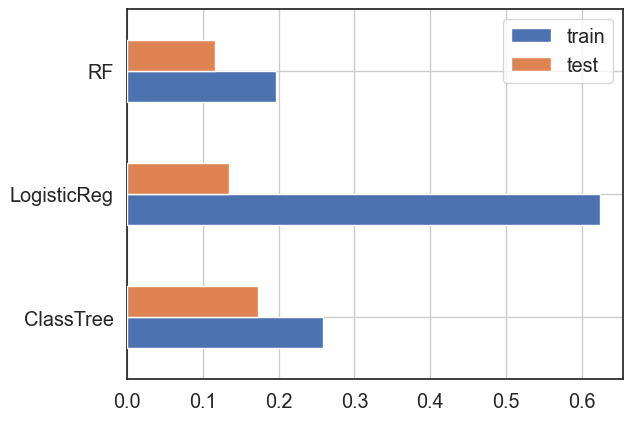

In [42]:
#model traaning vizualization
fig, ax = plt.subplots()
accuracies.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

### Performance metrics

#### Building a simple Multiple Regression Model


In [43]:
from sklearn.linear_model import LinearRegression
ml_reg = LinearRegression()
ml_reg.fit(X_train, y_train)
y_pred = ml_reg.predict(X_test)

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25,
                            max_features=6,
                            max_depth=4,
                            random_state=61)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=6, n_estimators=25,
                       random_state=61)

In [45]:
#Root Mean Squared Error

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred)**0.5
print("RMSE: {:,.2f}".format(rmse))


RMSE: 0.00


on average, the error the model will make is 642.54 minutes


In [46]:
##Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
print("MAE: {:,.2f}".format(mae))

MAE: 0.00


In [47]:
## R-squared (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared: {:,.2f}".format(r2))


R-squared: 1.00


In [48]:
eval_df = pd.DataFrame({"y_true": y_test, "y_pred": y_pred, "residuals": y_test - y_pred})


#### Costum metric: Percentage of Predictions Within Acceptable Error

In [49]:
eval_df["prop_error"] = eval_df["residuals"].abs()/eval_df["y_true"]


In [50]:
costum_metric = 100*(eval_df["prop_error"] < 0.15).mean()
print("Costum metric: {:,.1f}%".format(costum_metric))

Costum metric: 100.0%


### Model Visualization 


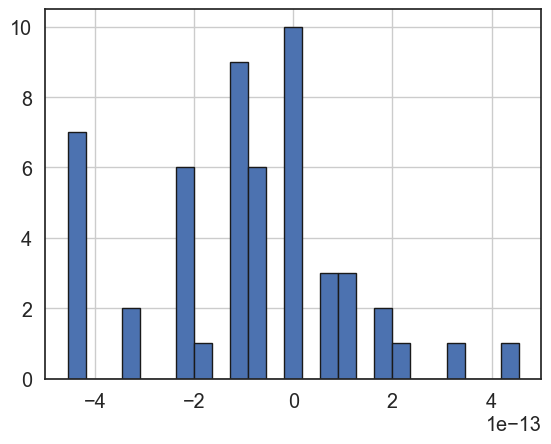

In [51]:
## Distributions of residuals
eval_df["residuals"].hist(bins=25, ec='k');


In [52]:
(eval_df["residuals"] <=0).mean()


0.7884615384615384

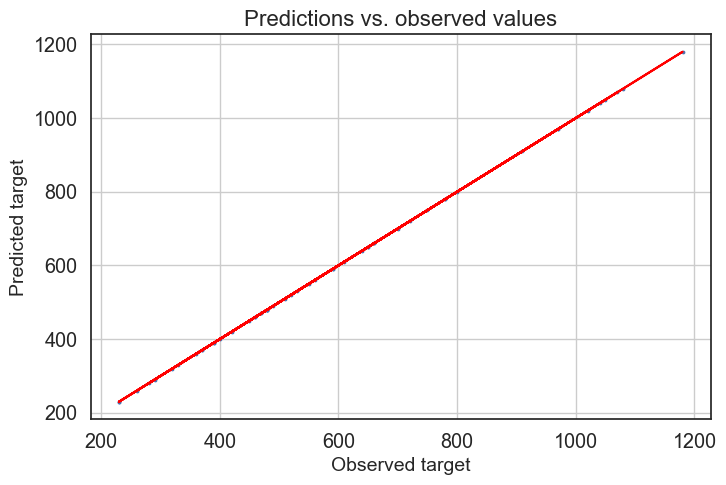

In [53]:
## Observed vs. predicted values plot
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(eval_df["y_true"], eval_df["y_pred"], s=3)
ax.plot(eval_df["y_true"], eval_df["y_true"], color='red')
ax.set_title('Predictions vs. observed values', fontsize=16)
ax.set_xlabel('Observed target', fontsize=14)
ax.set_ylabel('Predicted target', fontsize=14)
ax.grid();

In [54]:
eval_df["y_pred"].loc[eval_df["y_pred"]<0][:5]


Series([], Name: y_pred, dtype: float64)

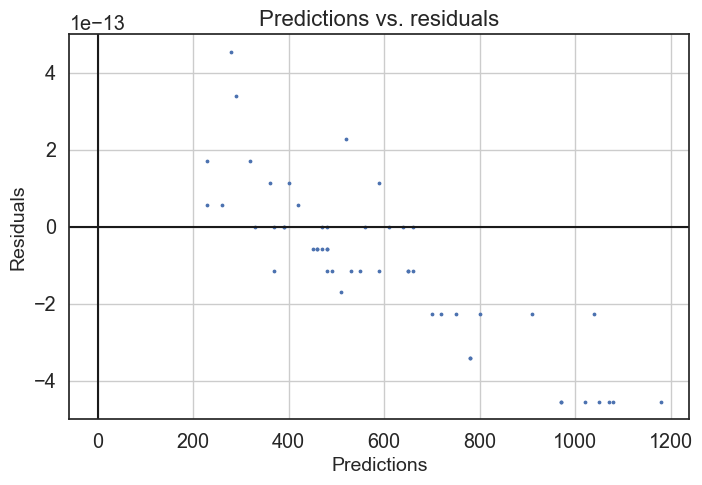

In [55]:
##Predicted values vs. residuals
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(eval_df["y_pred"], eval_df["residuals"], s=3)
ax.set_title('Predictions vs. residuals', fontsize=16)
ax.set_xlabel('Predictions', fontsize=14)
ax.set_ylabel('Residuals', fontsize=14)
ax.axhline(color='k'); ax.axvline(color='k');
ax.grid();

### K-fold cross validation for model evaluation


In [56]:
## Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

## Standardize the numeric features 
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

## Model training
ml_reg = LinearRegression()
ml_reg.fit(X_train, y_train)

## predictions
y_pred = ml_reg.predict(X_test)

## Evaluate the model using the same metric
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
print("MAE: {:,.2f}".format(mae))

MAE: 0.00


In [57]:
from sklearn.model_selection import cross_validate, RepeatedKFold

## Scaling the whole dataset
scaler = StandardScaler()
scaler.fit(X[numerical_features])
X.loc[:, numerical_features] = scaler.fit_transform(X[numerical_features])

## 10-fold cv
ml_reg = LinearRegression()
cv_results = cross_validate(ml_reg, X, y, scoring='neg_mean_absolute_error', cv=10)
scores = -1*cv_results['test_score']
scores

array([8.43482990e-14, 3.72232711e-13, 9.53502510e-14, 2.29207334e-13,
       1.08185862e-13, 1.43025376e-13, 8.06809816e-14, 2.08425869e-14,
       2.38742359e-13, 3.39165733e-13])

In [58]:
scores.mean()


1.7117814931352574e-13

### Create an interactive Application with Dash

Let's build the application that will serve the model's prediction. The steps followed are: 
1. Create the app instance 
2. Import an external CSS file 
3. Load the trained objects 
4. Build the input components and their respective divs 
5. Build the prediction function

 

In [62]:
## imports
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
import os


data= df


app = dash.Dash(__name__)

app.css.append_css({
    'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'
}) ##create the app instance and import the CSS file:


##build the objects that will receive the user's inputs.
numerical_features = ['battery','target','range','acceleration..0.100.']
options_dropdown = [{'label':x.upper(), 'value':x} for x in numerical_features]

dd_x_var = dcc.Dropdown(
        id='x-var',
        options = options_dropdown,
        value = 'target'
        )

div_x_var =  html.Div(
        children=[html.H4('Variable for x axis: '), dd_x_var],
        className="six columns"
        )
        

dd_y_var = dcc.Dropdown(
        id='y-var',
        options = options_dropdown,
        value = 'range'
        ) 

div_y_var =  html.Div(
        children=[html.H4('Variable for y axis: '), dd_y_var],
        className="six columns"
        )

app.layout = html.Div(children=[
        html.H1('Adding interactive controls'),
        html.H2('Interactive scatter plot example'),
        html.Div(
                children=[div_x_var, div_y_var],
                className="row"
                ),  
        dcc.Graph(id='scatter')
        ])


@app.callback(
        Output(component_id='scatter', component_property='figure'),
        [Input(component_id='x-var', component_property='value'), Input(component_id='y-var', component_property='value')])
def scatter_plot(x_col, y_col):
    trace = go.Scatter(
            x = df[x_col],
            y = df[y_col],
            mode = 'markers'
            )
    
    layout = go.Layout(
            title = 'Scatter plot',
            xaxis = dict(title = x_col.upper()),
            yaxis = dict(title = y_col.upper())
            )
    
    output_plot = go.Figure(
            data = [trace],
            layout = layout
            )
    
    return output_plot
 
##The code that will run the server      
if __name__ == '__main__':
    app.run_server(debug=True)

/Users/maduffaut/anaconda3/lib/python3.11/site-packages/dash/resources.py:61: UserWarning:

You have set your config to `serve_locally=True` but A local version of https://codepen.io/chriddyp/pen/bWLwgP.css is not available.
If you added this file with `app.scripts.append_script` or `app.css.append_css`, use `external_scripts` or `external_stylesheets` instead.
See https://dash.plotly.com/external-resources



When you run the application, user should see something like this:
